In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import seaborn as sns
%matplotlib inline

In [2]:
from trackml.dataset import load_event, load_dataset
from trackml.randomize import shuffle_hits
from trackml.score import score_event

In [3]:
# One event of 8850
event_id = 'event000001000'
# "All methods either take or return pandas.DataFrame objects"
hits, cells, particles, truth = load_event('../train_sample/train_100_events/'+event_id)

In [4]:
hits.head()

hit_id          x         y       z  volume_id  layer_id  module_id
0       1 -64.409897 -7.163700 -1502.5          7         2          1
1       2 -55.336102  0.635342 -1502.5          7         2          1
2       3 -83.830498 -1.143010 -1502.5          7         2          1
3       4 -96.109100 -8.241030 -1502.5          7         2          1
4       5 -62.673599 -9.371200 -1502.5          7         2          1

In [5]:
hits.tail()

hit_id           x          y       z  volume_id  layer_id  module_id
120934  120935 -763.862976  51.569401  2944.5         18        12         97
120935  120936 -808.705017   3.459260  2944.5         18        12         97
120936  120937 -982.935974  41.460899  2952.5         18        12         98
120937  120938 -942.698975  18.489100  2952.5         18        12         98
120938  120939 -922.890015   2.092850  2952.5         18        12         98

In [6]:
hits.describe()

hit_id              x              y              z  \
count  120939.00000  120939.000000  120939.000000  120939.000000   
mean    60470.00000      -1.769457       4.751043      -2.314452   
std     34912.22644     305.714539     305.173279    1061.935303   
min         1.00000   -1024.839966   -1025.109985   -2955.500000   
25%     30235.50000    -100.146000     -95.896503    -655.799988   
50%     60470.00000      -1.651340       1.005920      -1.800000   
75%     90704.50000      97.267651     103.224003     655.799988   
max    120939.00000    1025.329956    1024.849976    2955.500000   

           volume_id       layer_id      module_id  
count  120939.000000  120939.000000  120939.000000  
mean       10.921564       5.918389     371.969117  
std         3.365705       3.407428     529.032206  
min         7.000000       2.000000       1.000000  
25%         8.000000       4.000000      60.000000  
50%         9.000000       6.000000     119.000000  
75%        13.000000       8.000000     490.000000  
max        18.000000      14.000000    3192.000000

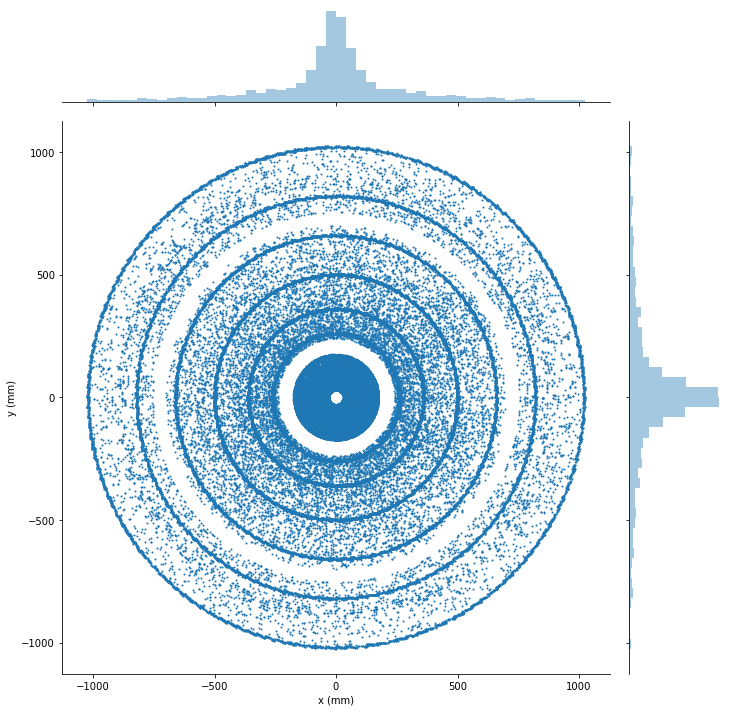

In [9]:
#plt.figure(figsize=(10,10))
#plt.scatter(hits.x,hits.y, s=1)
#plt.show()
# Essentially the same plot as above but includes univariate plots and Pearson corr coeff
radialview = sns.jointplot(hits.x, hits.y, height=10, s=1)
radialview.set_axis_labels('x (mm)', 'y (mm)')
plt.show()

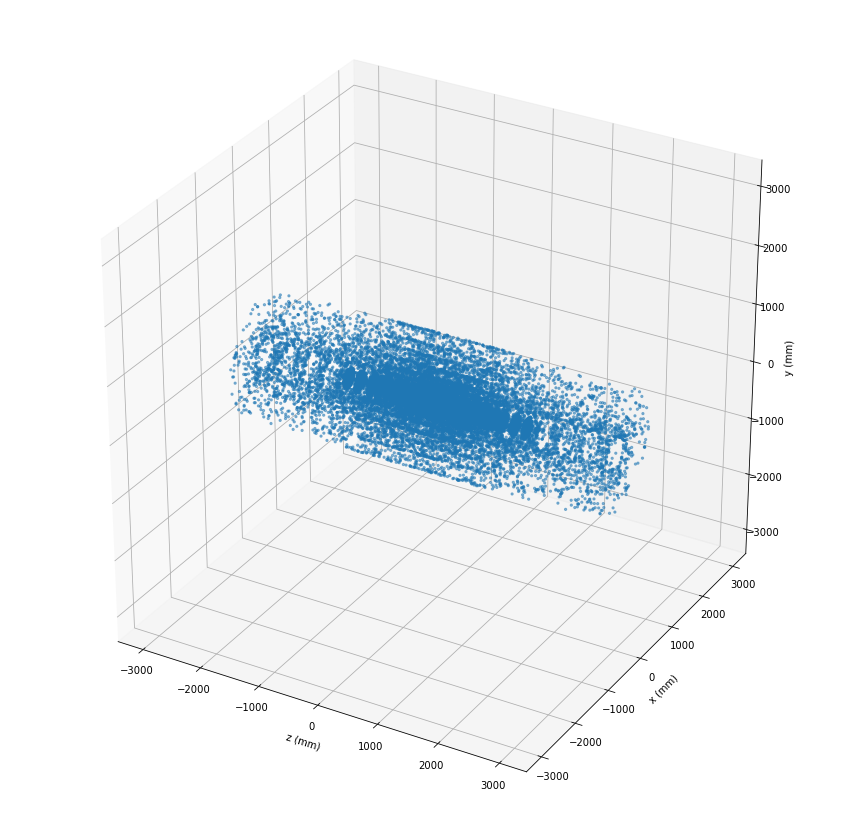

In [13]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
sample = hits.sample(30000)
ax.scatter(sample.z, sample.x, sample.y, s=5, alpha=0.5)
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')
# These two added to widen the 3D space
ax.scatter(3000,3000,3000, s=0)
ax.scatter(-3000,-3000,-3000, s=0)
plt.show()

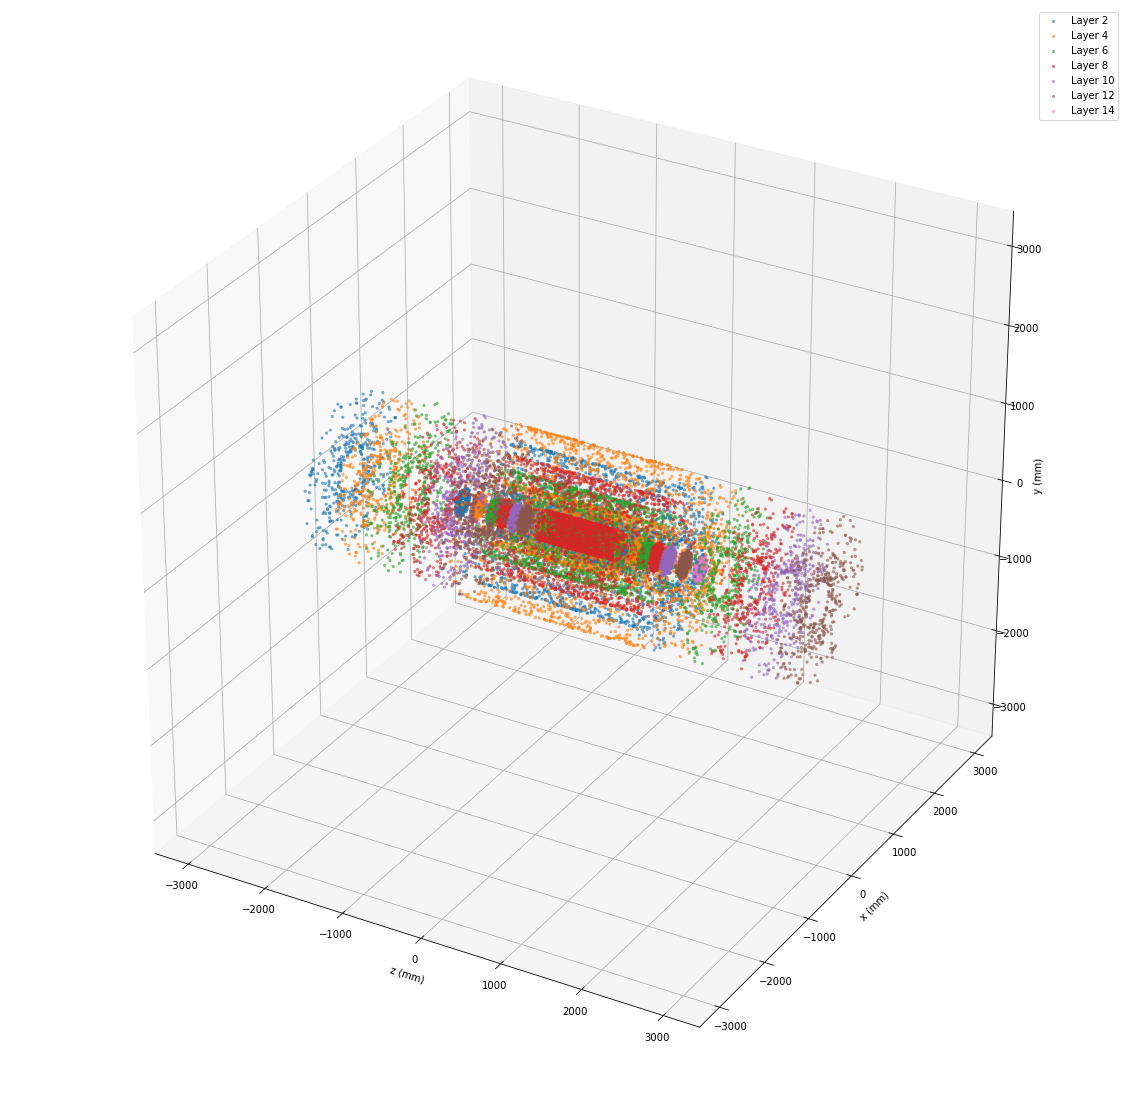

In [14]:
layers = hits.layer_id.unique()

plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
for layer in layers:
    l = sample[sample.layer_id == layer]
    ax.scatter(l.z, l.x, l.y, s=5, label='Layer '+str(layer), alpha=0.5)
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')
ax.legend()
# These two added to widen the 3D space
ax.scatter(3000,3000,3000, s=0)
ax.scatter(-3000,-3000,-3000, s=0)
plt.show()

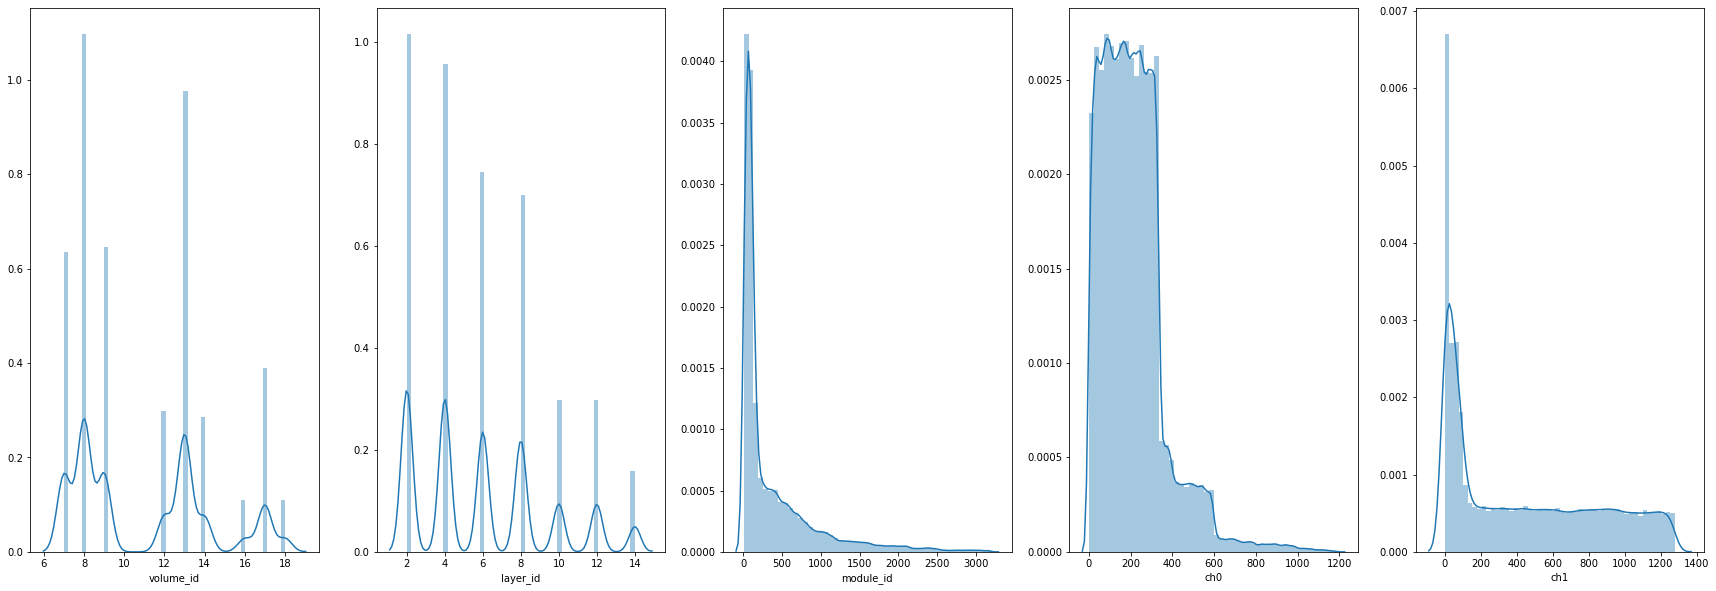

In [12]:
plt.figure(figsize=(30,10))
plt.subplot(1,5,1)
sns.distplot(hits.volume_id)
plt.subplot(1,5,2)
sns.distplot(hits.layer_id)
plt.subplot(1,5,3)
sns.distplot(hits.module_id)
plt.subplot(1,5,4)
sns.distplot(cells.ch0)
plt.subplot(1,5,5)
sns.distplot(cells.ch1)
plt.show()

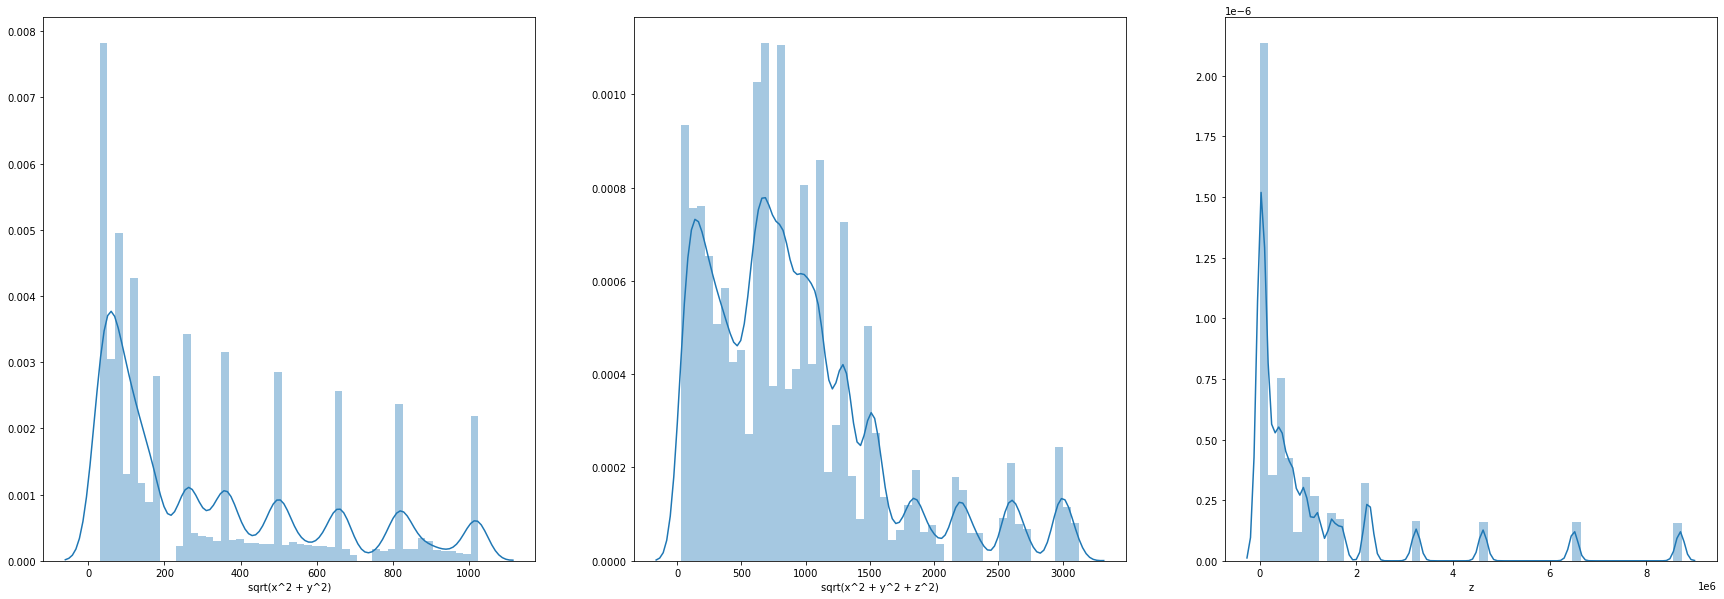

In [16]:
plt.figure(figsize=(30,10))
radius2 = np.sqrt(hits.x**2 + hits.y**2)
plt.subplot(1,3,1)
sns.distplot(radius2, axlabel='sqrt(x^2 + y^2)')
plt.subplot(1,3,2)
radius3 = np.sqrt(hits.x**2 + hits.y**2 + hits.z**2)
sns.distplot(radius3, axlabel='sqrt(x^2 + y^2 + z^2)')
plt.subplot(1,3,3)
sns.distplot(hits.z**2, axlabel='z')
plt.show()

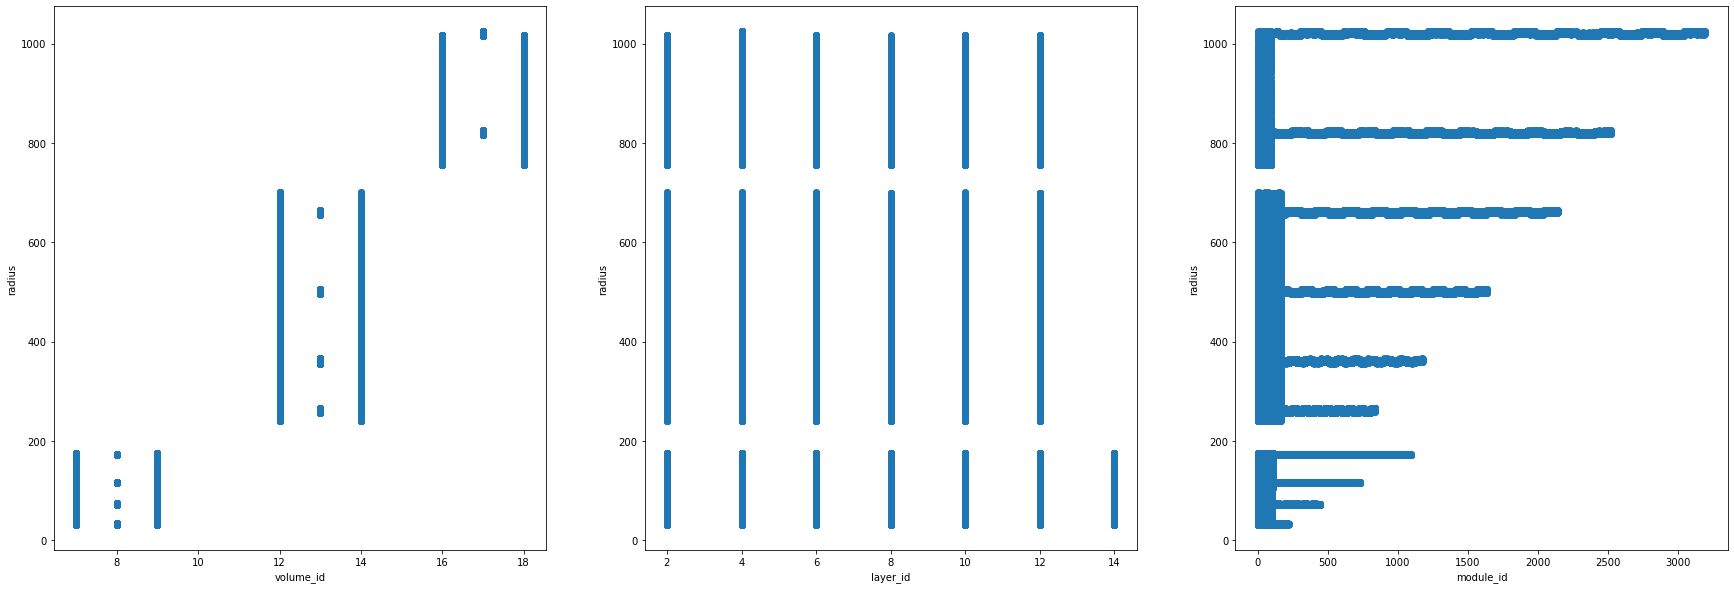

In [17]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.scatter(hits.volume_id, radius2)
plt.xlabel('volume_id')
plt.ylabel('radius')
plt.subplot(1,3,2)
plt.scatter(hits.layer_id, radius2)
plt.xlabel('layer_id')
plt.ylabel('radius')
plt.subplot(1,3,3)
plt.scatter(hits.module_id, radius2)
plt.xlabel('module_id')
plt.ylabel('radius')
plt.show()

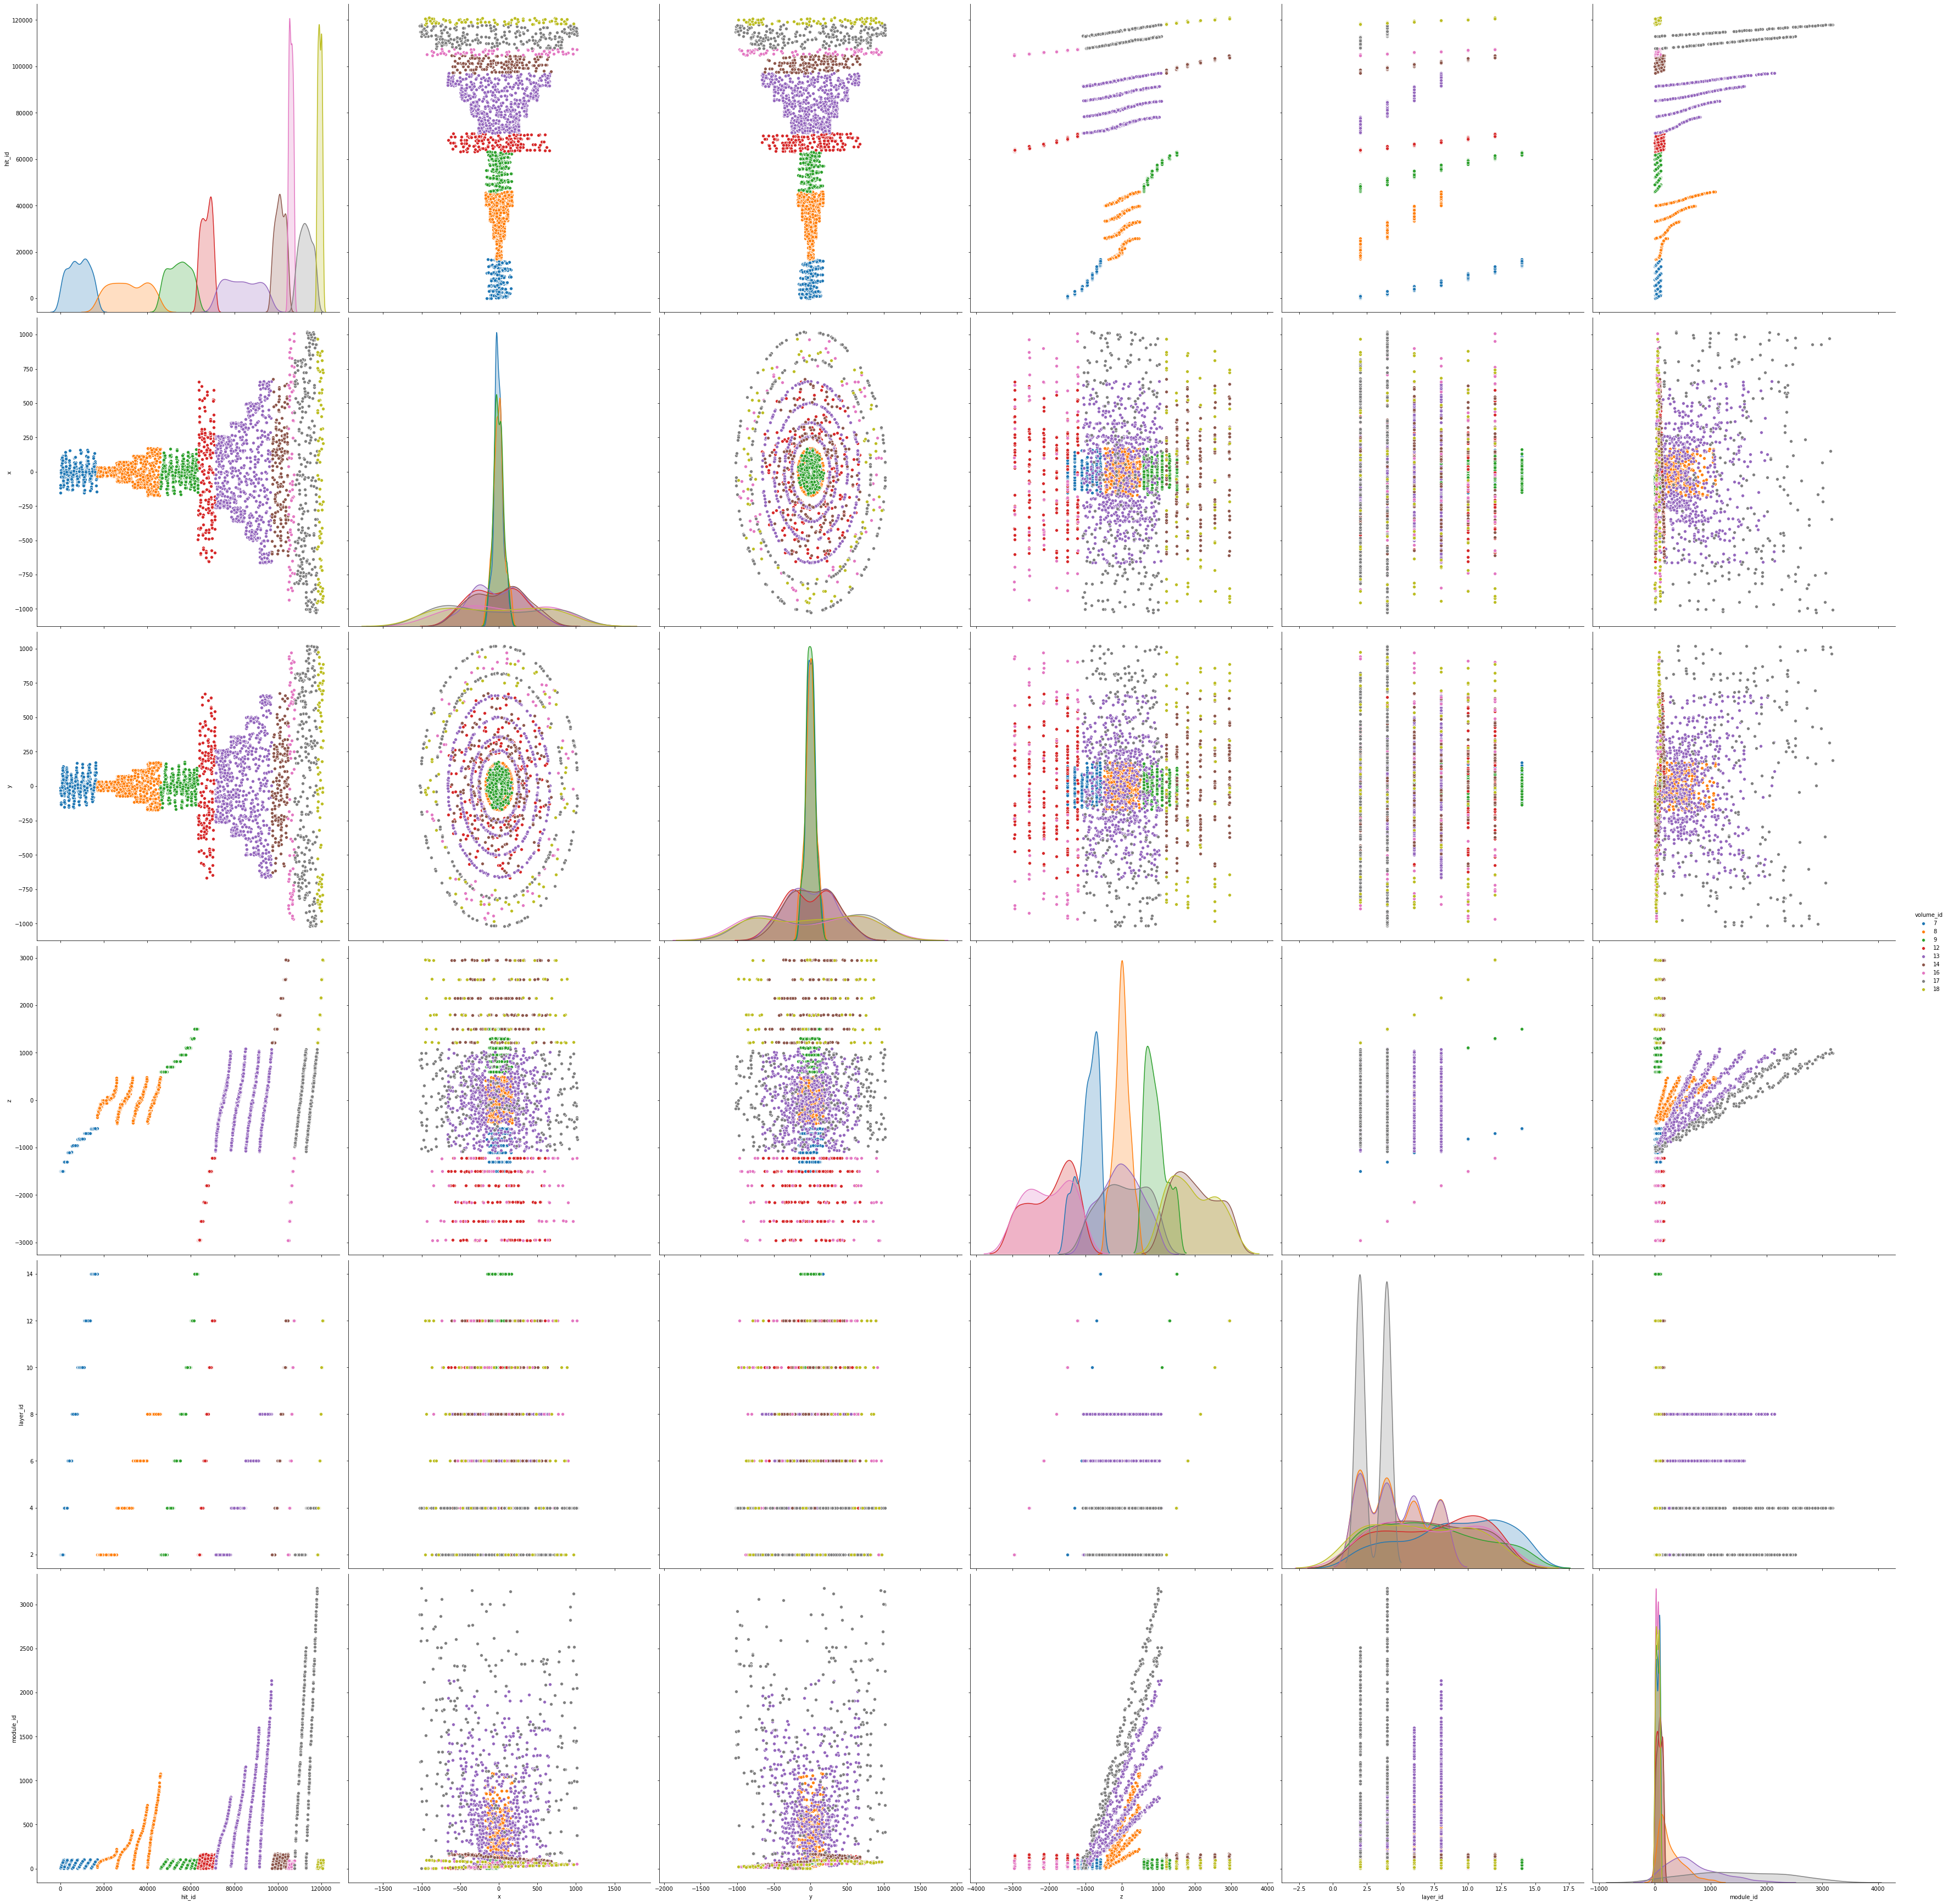

In [19]:
# Pairplotting 120k hits takes too long, so let's look at a random sampling
#sample = hits.drop('hit_id', axis=1).sample(3000)
sample = hits.sample(3000)
# I've also decided to color-code them by group again. Makes sense to me.
sns.pairplot(sample, hue='volume_id', height=8)
plt.show()

In [22]:
cells.head()

hit_id  ch0  ch1     value
0       1  209  617  0.013832
1       1  210  617  0.079887
2       1  209  618  0.211723
3       2   68  446  0.334087
4       3   58  954  0.034005

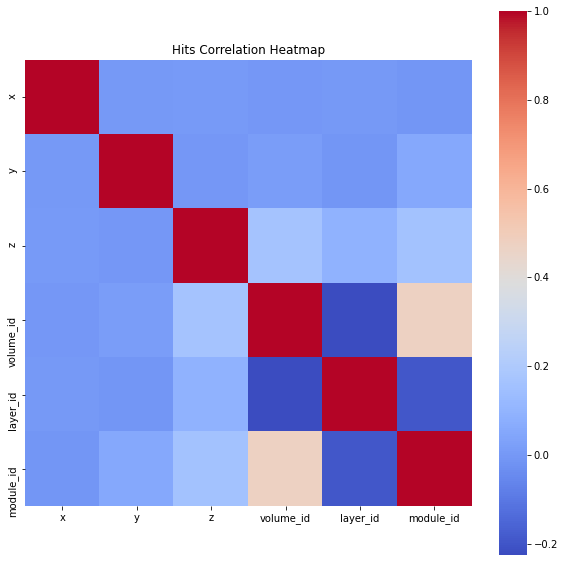

In [20]:
plt.figure(figsize=(10, 10))
hitscorr = hits.drop('hit_id', axis=1).corr()
sns.heatmap(hitscorr, cmap='coolwarm', square=True)
plt.title('Hits Correlation Heatmap')
plt.show()

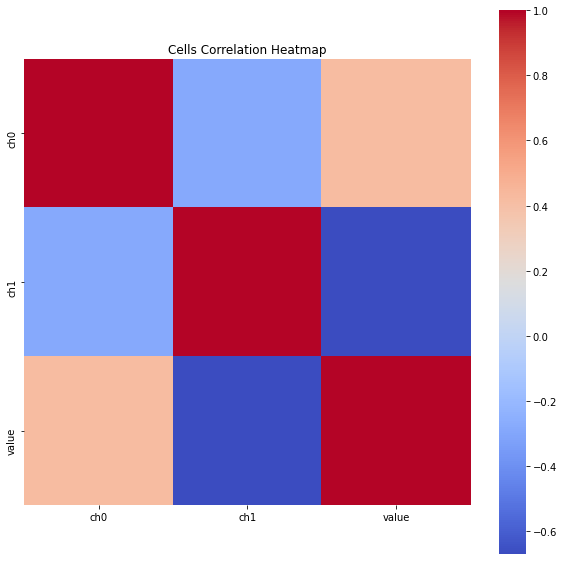

In [21]:
plt.figure(figsize=(10, 10))
cellscorr = cells.drop('hit_id', axis=1).corr()
sns.heatmap(cellscorr, cmap='coolwarm', square=True)
plt.title('Cells Correlation Heatmap')
plt.show()

In [23]:
nhits0 = particles[particles.nhits ==0]
nhits0_2 = nhits0[nhits0.particle_id == 4503805785800704]
nhits0[['px','py','pz']].describe()

px           py           pz
count  1698.000000  1698.000000  1698.000000
mean     -0.007211     0.004067     0.016608
std       0.266189     0.222324     4.219045
min      -3.485500    -2.021620   -63.392799
25%      -0.102247    -0.099493    -0.159631
50%      -0.002730     0.004966     0.006458
75%       0.099373     0.103643     0.174475
max       2.312550     1.771940    43.103199

In [24]:
pt_mean = np.mean(np.sqrt(particles.px**2 + particles.py**2))
pt_mean_unc = np.std(np.sqrt(particles.px**2 + particles.py**2))
pt0_mean = np.mean(np.sqrt(nhits0.px**2 + nhits0.py**2))
pt0_mean_unc = np.std(np.sqrt(nhits0.px**2 + nhits0.py**2))
print('Mean transverse momentum:')
print('    full:', pt_mean, ' +-', pt_mean_unc, 'GeV/c')
print(' nhits=0:', pt0_mean, '+-', pt0_mean_unc)

Mean transverse momentum:
    full: 0.5541662573814392  +- 0.9837403893470764 GeV/c
 nhits=0: 0.22378861904144287 +- 0.26495465636253357


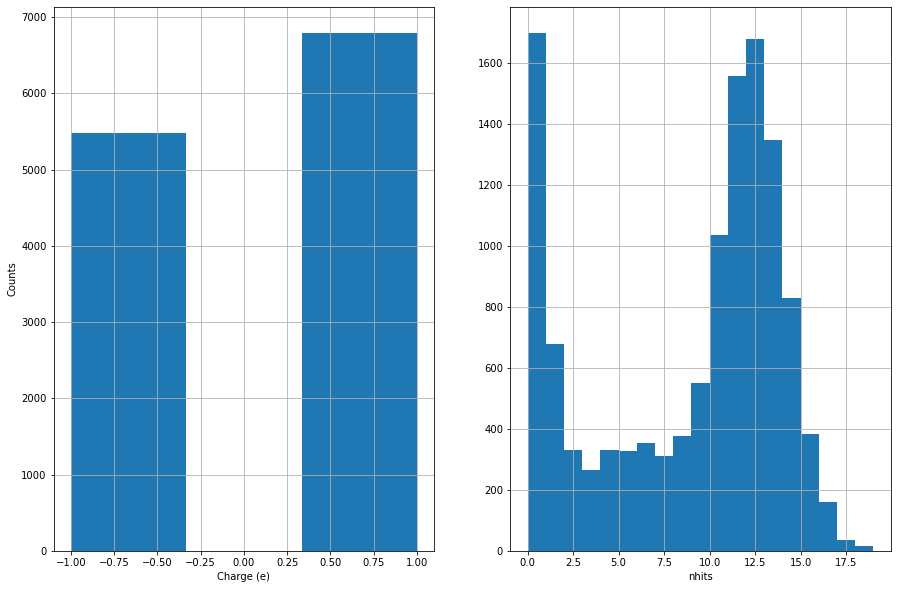

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
particles.q.hist(bins=3)
plt.xlabel('Charge (e)')
plt.ylabel('Counts')
plt.subplot(1,2,2)
particles.nhits.hist(bins=particles.nhits.max())
plt.xlabel('nhits')
plt.show()

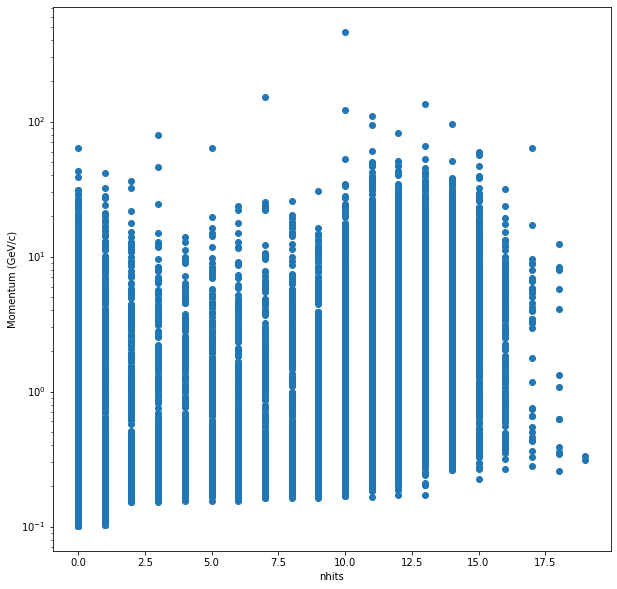

In [26]:
plt.figure(figsize=(10,10))
p = np.sqrt(particles.px**2 + particles.py**2 + particles.pz**2)
plt.scatter(particles.nhits, p)
plt.yscale('log')
plt.xlabel('nhits')
plt.ylabel('Momentum (GeV/c)')
plt.show()

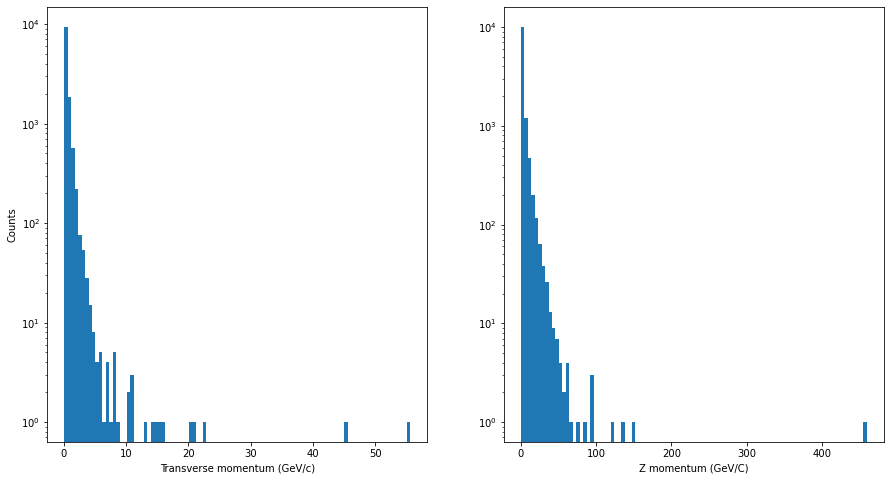

In [27]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
#plt.xscale('log')
plt.hist(np.sqrt(particles.px**2 + particles.py**2), bins=100, log=True)
plt.xlabel('Transverse momentum (GeV/c)')
plt.ylabel('Counts')
plt.subplot(1,2,2)
#plt.xscale('log')
plt.hist(particles.pz.abs(), bins=100, log=True)
plt.xlabel('Z momentum (GeV/C)')
plt.show()

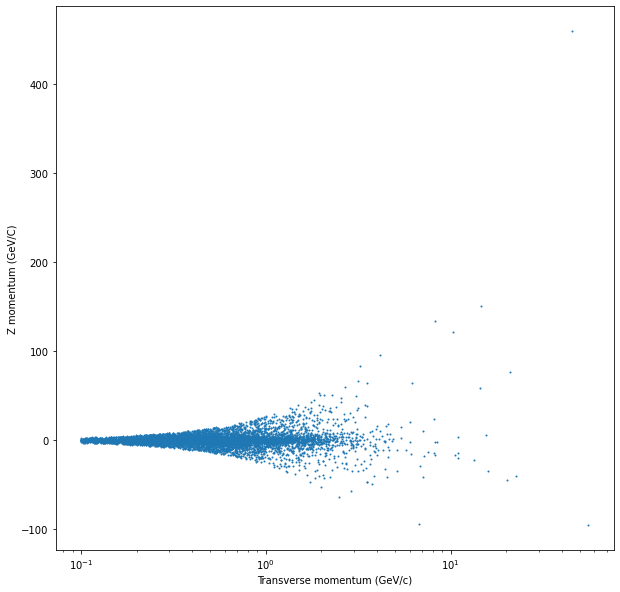

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(np.sqrt(particles.px**2 + particles.py**2), particles.pz, s=1)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Transverse momentum (GeV/c)')
plt.ylabel('Z momentum (GeV/C)')
#plt.zlabel('Counts')
plt.show()

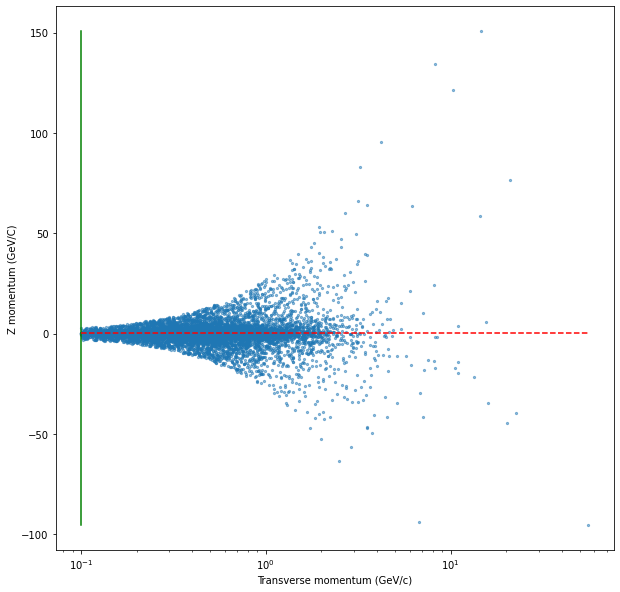

In [29]:
p = particles[particles.pz < 200]

plt.figure(figsize=(10,10))
plt.scatter(np.sqrt(p.px**2 + p.py**2), p.pz, s=5, alpha=0.5)
plt.plot([0.1,0.1],[p.pz.min(),p.pz.max()], c='g') # 0.1 instead of 0 because log plot.
plt.plot([0.1,np.sqrt(p.px**2 + p.py**2).max()],[0.1,0.1], c='r', linestyle='--')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Transverse momentum (GeV/c)')
plt.ylabel('Z momentum (GeV/C)')
plt.show()

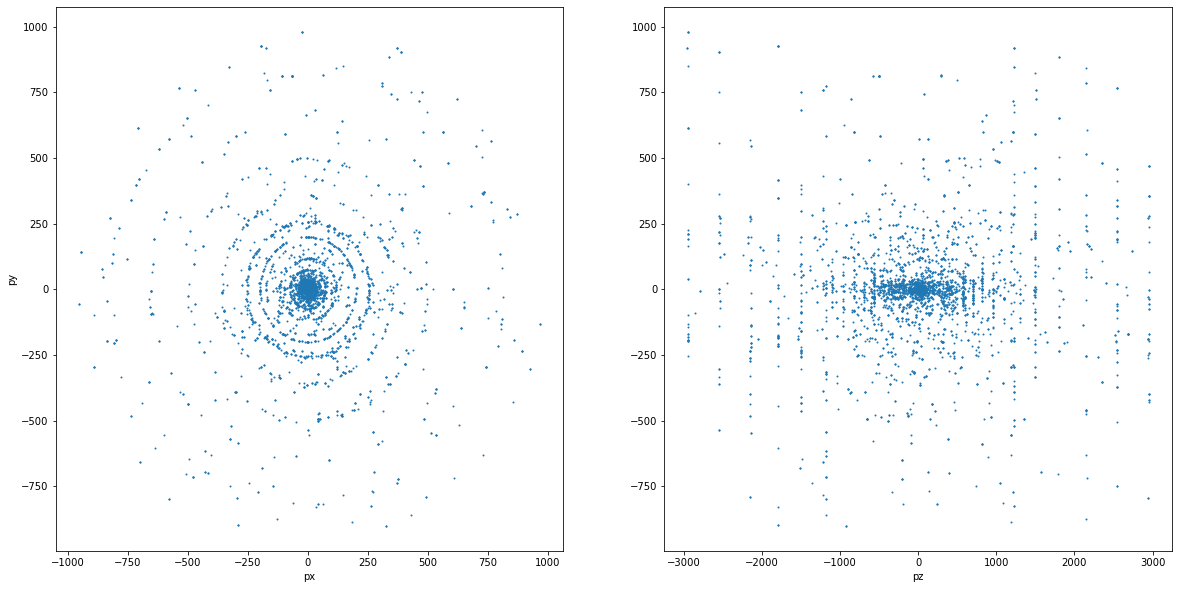

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(particles.vx, particles.vy, s=1)
plt.xlabel('px')
plt.ylabel('py')
plt.subplot(1,2,2)
plt.scatter(particles.vz, particles.vy, s=1)
plt.xlabel('pz')
plt.show()

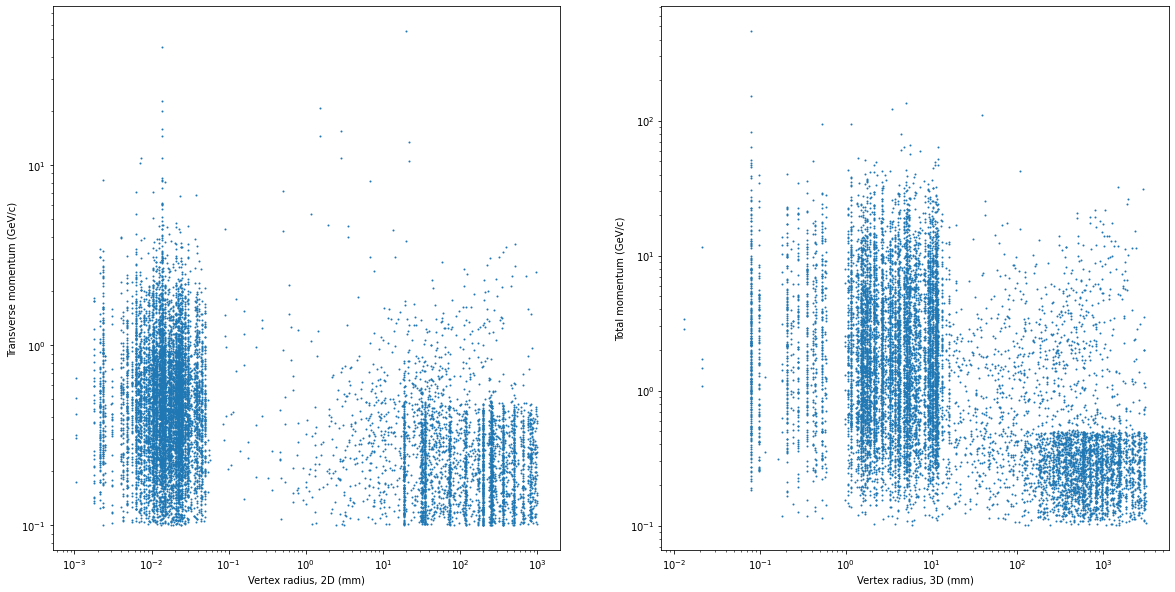

In [31]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(np.sqrt(particles.vx**2+particles.vy**2), np.sqrt(particles.px**2+particles.py**2), s=1)
plt.xlabel('Vertex radius, 2D (mm)')
plt.ylabel('Transverse momentum (GeV/c)')
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,2,2)
plt.scatter(np.sqrt(particles.vx**2+particles.vy**2+particles.vz**2), np.sqrt(particles.px**2+particles.py**2+particles.pz**2), s=1)
plt.xlabel('Vertex radius, 3D (mm)')
plt.ylabel('Total momentum (GeV/c)')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [32]:
len(particles), len(particles.particle_id.unique())

(12263, 12263)

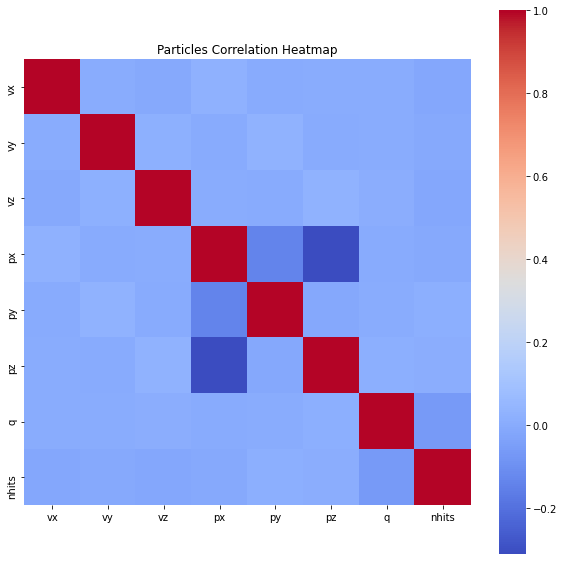

In [33]:
plt.figure(figsize=(10, 10))
particlescorr = particles.drop('particle_id', axis=1).corr()
sns.heatmap(particlescorr, cmap='coolwarm', square=True)
plt.title('Particles Correlation Heatmap')
plt.show()

In [34]:
truth.head()

hit_id         particle_id         tx        ty      tz            tpx  \
0       1                   0 -64.411598 -7.164120 -1502.5  250710.000000   
1       2   22525763437723648 -55.338501  0.630805 -1502.5      -0.570605   
2       3                   0 -83.828003 -1.145580 -1502.5  626295.000000   
3       4  297237712845406208 -96.122902 -8.230360 -1502.5      -0.225235   
4       5  418835796137607168 -62.659401 -9.375040 -1502.5      -0.281806   

             tpy           tpz    weight  
0 -149908.000000 -956385.00000  0.000000  
1       0.028390     -15.49220  0.000010  
2 -169767.000000 -760877.00000  0.000000  
3      -0.050968      -3.70232  0.000008  
4      -0.023487      -6.57318  0.000009

In [35]:
# Number of unique particles
len(truth.particle_id.unique())

10566

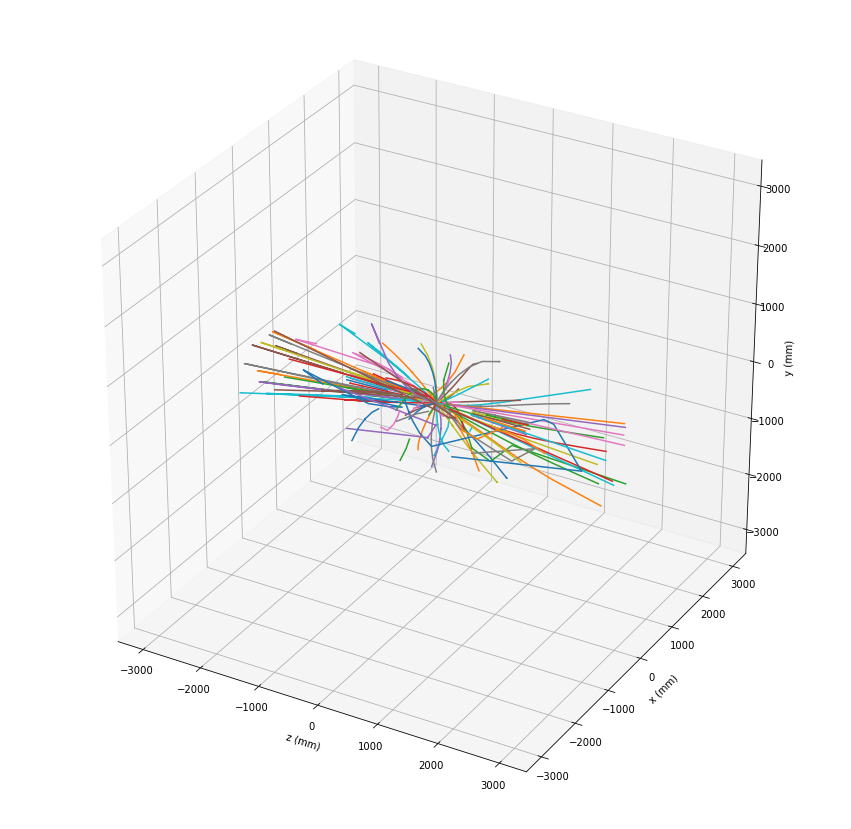

In [36]:
# Get every 100th particle
tracks = truth.particle_id.unique()[1::100]

plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
for track in tracks:
    t = truth[truth.particle_id == track]
    ax.plot3D(t.tz, t.tx, t.ty)
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')
# These two added to widen the 3D space
ax.scatter(3000,3000,3000, s=0)
ax.scatter(-3000,-3000,-3000, s=0)
plt.show()